In [4]:
"""
Here I have tried scraping a job listing website inorder to decide which skill are actually necessay for 
data scientist positions that are common nowadays.I have taken some of the famous and obivious skills 
to map my results. Results


"""







#

In [ ]:

from IPython.display import HTML
import numpy as np
import urllib2
import bs4
import time

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("dark")



In [10]:
url = 'https://www.naukri.com/data-scientist-jobs-in-india'
#source = urllib2.urlopen(url).read()
try:
    f = urllib2.urlopen(url)
except urllib2.HTTPError, e:
    print e.fp.read()

<HTML><HEAD>
<TITLE>Access Denied</TITLE>
</HEAD><BODY>
<H1>Access Denied</H1>
 
You don't have permission to access "http&#58;&#47;&#47;www&#46;naukri&#46;com&#47;data&#45;scientist&#45;jobs&#45;in&#45;india" on this server.<P>
Reference&#32;&#35;18&#46;a7e0d4d9&#46;1507570461&#46;8eeac25
</BODY>
</HTML>



In [39]:
url = 'https://www.naukri.com/data-scientist-jobs-in-india'
req = urllib2.Request(url, headers={'User-Agent' : "Magic Browser"}) 
source = urllib2.urlopen( req )
bs_tree = bs4.BeautifulSoup(source)
web_string = bs_tree.find_all('a',attrs={'class':'content'})
link_list = []
for string_got in web_string :
    link_list.append(string_got['href'])







['https://www.naukri.com/job-listings-Data-Scientist-EYGBS-India-Private-Limited-Trivandrum-5-to-10-years-091017005966?src=jobsearchDesk&sid=15075727816467&xp=1',
 'https://www.naukri.com/job-listings-Lead-Data-Scientist-Accenture-Solutions-Pvt-Ltd-Bengaluru-4-to-9-years-091017003692?src=jobsearchDesk&sid=15075727816467&xp=2',
 'https://www.naukri.com/job-listings-Data-Scientist-Sr-Level-ICs-ManpowerGroup-Services-India-Private-Limited-Bengaluru-10-to-20-years-300917001477?src=jobsearchDesk&sid=15075727816467&xp=3',
 'https://www.naukri.com/job-listings-Data-Scientist-Online-Retail-Domain-Mindaquest-Business-Solution-Pvt-Ltd-Delhi-NCR-Bengaluru-5-to-10-years-051017900037?src=jobsearchDesk&sid=15075727816467&xp=4',
 'https://www.naukri.com/job-listings-Data-Scientist-Sr-Data-Scientist-Chennai-Yellow-Box-HR-Services-Pvt-Ltd-Chennai-4-to-9-years-140817003244?src=jobsearchDesk&sid=15075727816467&xp=5',
 'https://www.naukri.com/job-listings-Data-Scientist-Online-Retail-Domain-Mindaquest-Bus

In [25]:
job_count_string = bs_tree.find('span',attrs={'class':'cnt'} ).contents[0]

In [30]:
job_count = int(job_count_string.split()[-1])
base_url = url

In [42]:
#website list 50 postings at a time. Need to scrape 50 at a time

num_pages = int(np.ceil(job_count/50.0))
#the pages after 10 have entries that are not relevant
link_list = []
for i in range(10):
    url = ""
    if i==0:
        url = base_url
    else:
        url =  base_url + "-" + str(i)
    
    request =  urllib2.Request(url,headers={'User-Agent' : "Magic Browser"})
    source =   urllib2.urlopen(request)
    bs_tree = bs4.BeautifulSoup(source)
    web_string = bs_tree.find_all('a',attrs={'class':'content'})
    for string_got in web_string :
        link_list.append(string_got['href'])

print "got  ",len(link_list)," posting"
    

got   500  posting


In [73]:
request =  urllib2.Request(link_list[1],headers={'User-Agent' : "Magic Browser"})
source =   urllib2.urlopen(request)
bs_tree = bs4.BeautifulSoup(source)
all_removed = bs_tree.find('div',attrs={'class':'JD'}).get_text().lower()
print "ting tong" in all_removed
print all_removed

False
  job description        send me jobs like this      roles and responsibility:    the person will be responsible for working on ideas/business problems to develop conceptual prototypes by designing and executing processes related to predictive / analytical modeling, data mining, and research on large scale, complex data sets, using statistical, machine learning, graph modeling, text mining and other modern techniques         key skills required :  	6-10 years as hands on analytics professional with deep experience and expertise in data preparation, exploratory data analysis, advanced analytical modeling and business visualization.  	should be an expert in analytical techniques including machine learning algorithms.  	should be very good and hands on in r, python, sas, sql and nosql databases, text mining. 	should have experience handling big data including structured, unstructured, real time and social data.  	should have good knowledge and experience in cloud computing services 

In [44]:
import cPickle

In [47]:
with open('scraped_links.pkl','wb') as f:
    cPickle.dump(link_list,f)

In [48]:
with open('scraped_links.pkl','r') as f:
    job_links = cPickle.load(f)

In [79]:
skill_set = {'r': 0 ,'python' : 0,'mapreduce' : 0,'spark' : 0,'machine learning' : 0,'c++' : 0,'deep learning' : 0,'statistics' : 0}

In [52]:
import re

In [83]:
#this code runs for a long time


tot=0
for link in job_links:
    try:
        request =  urllib2.Request(link,headers={'User-Agent' : "Magic Browser"})
        source = urllib2.urlopen(request).read()
    except urllib2.HTTPError:
        print "HTTP Error"
        continue
    except urllib2.URLError:
        print "URLError"
        continue
    except socket.error as error:
        print "Connection closed"
        continue
    bs_tree = bs4.BeautifulSoup(source)
    if bs_tree.find('div',attrs={'class':'JD'}) is not None:
        job_description = bs_tree.find('div',attrs={'class':'JD'}).get_text().lower()
    else:
        job_description = bs_tree.get_text()

    tot+=1
    for key in skill_set.keys():
        if key in job_description:
            skill_set[key] +=1

    

In [84]:
print skill_set

{'r': 544, 'python': 358, 'deep learning': 93, 'spark': 124, 'statistics': 224, 'mapreduce': 40, 'c++': 56, 'machine learning': 398}


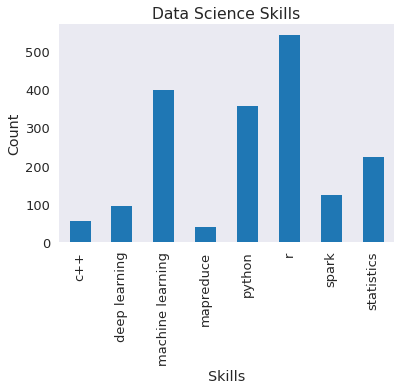

In [88]:
pseries = pd.Series(skill_set)


pseries.plot(kind = 'bar')
## set the title to Score Comparison
plt.title('Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()